In [6]:
import pandas as pd
from matplotlib import pyplot as plt

# allow pandas to mtplotlib conversion
from pandas import plotting as converter
converter.register_matplotlib_converters()

In [12]:
IDT_DATETIME_FORMAT = "%Y-%m-%dT%H:%M:%S.%f%z"

def format_dsco2(data):
    data.columns = ["timestamp", "ppm_co2"]
    data.timestamp = pd.to_datetime(data.timestamp, unit='s')
    return data

def format_idt(data):
    rename_dict = {"start_time": "timestamp", "eCO2 (ppm)": "ppm_co2"}
    data = data.rename(columns=rename_dict)
    data = data[data.ppm_co2 != 0]
    data.timestamp = data.timestamp + "+0500"
    data.timestamp = pd.to_datetime(data.timestamp, format=IDT_DATETIME_FORMAT)
    return data


def plot_data(x, y, color):
        plt.figure(figsize=(20,5))
        plt.plot(x, y, color)

## Load and display DS-CO2-20

In [13]:
dsco21 = pd.read_csv("ds-co2-20/s1-1.csv")
dsco21 = format_dsco2(dsco21)
dsco21.head()

,timestamp,ppm_co2
0,2020-04-08 11:07:13.317976475,461
1,2020-04-08 11:07:14.319091797,461
2,2020-04-08 11:07:15.315467596,462
3,2020-04-08 11:07:16.317836523,462
4,2020-04-08 11:07:17.312409878,462


In [14]:
dsco21.shape

(13528, 2)

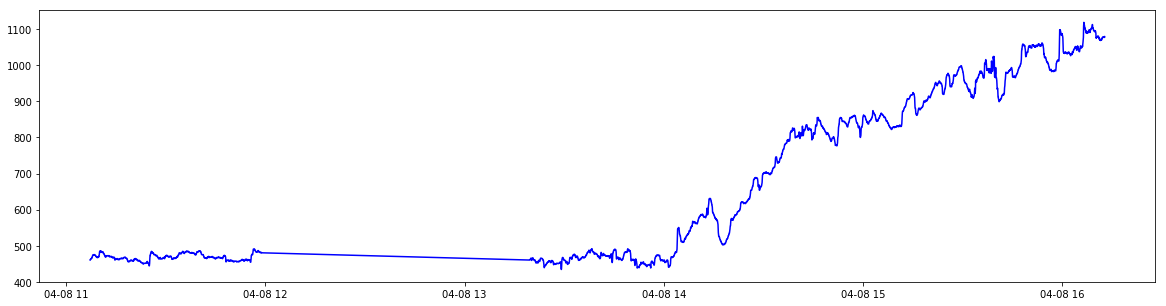

In [16]:
plot_data(dsco21.timestamp, dsco21.ppm_co2, 'b')

In [27]:
idt1 = format_idt(pd.read_csv("idt/s2-1-algo-en.csv"))
idt1.head()

,board_type,sequence,sleeptime,run,timestamp,device_tracking,making_code,Rhtr_RT,generalpurpose,VDDH,...,Wait1,Temp2,Wait2,Rmox_Temp1,Rmox_Temp2,comment,EtOH (ppm),IAQ,TVOC (mg/m^3),ppm_co2
15,IDT HiCom,hard coded,0.0,16.0,2020-04-08 18:21:23.733000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,41116.338751,41147.030066,NaN,0.0,0.0,0.0,400.0
16,IDT HiCom,hard coded,0.0,17.0,2020-04-08 18:21:25.763000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,41623.706606,41891.024986,NaN,0.0,0.0,0.0,400.0
17,IDT HiCom,hard coded,0.0,18.0,2020-04-08 18:21:27.768000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,42748.201144,42587.683357,NaN,0.0,0.0,0.0,400.0
18,IDT HiCom,hard coded,0.0,19.0,2020-04-08 18:21:29.792000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,43033.493412,43116.608499,NaN,0.0,0.0,0.0,400.0
19,IDT HiCom,hard coded,0.0,20.0,2020-04-08 18:21:31.798000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,43689.506173,44369.919538,NaN,0.0,0.0,0.0,400.0


## IDT PART-1 (Room algorithm enabled)

In [28]:
idt1.shape

(2854, 27)

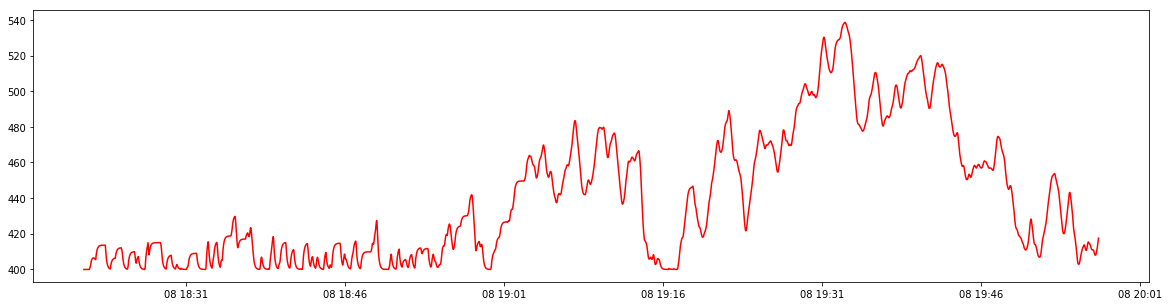

In [31]:
plot_data(idt1.timestamp, idt1.ppm_co2, 'r')

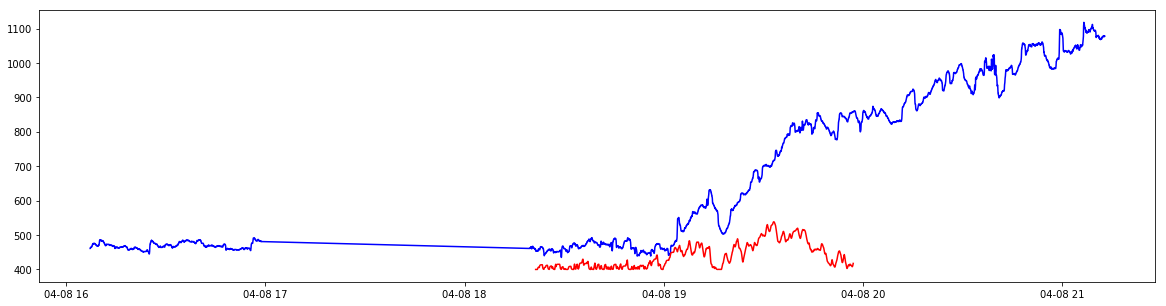

In [36]:
plt.figure(figsize=(20,5))
plt.plot(dsco21.timestamp, dsco21.ppm_co2, 'b')
plt.plot(idt1.timestamp, idt1.ppm_co2, 'r')

## IDT PART-II (Room algorithm disabled)

In [37]:
idt2 = format_idt(pd.read_csv("idt/s2-2-algo-dis.csv"))
idt2.head()

,board_type,sequence,sleeptime,run,timestamp,device_tracking,making_code,Rhtr_RT,generalpurpose,VDDH,...,Wait1,Temp2,Wait2,Rmox_Temp1,Rmox_Temp2,comment,EtOH (ppm),IAQ,TVOC (mg/m^3),ppm_co2
1,IDT HiCom,hard coded,0.0,2898.0,2020-04-08 19:58:01.077000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,167990.986572,170346.433860,NaN,0.000000,0.000000,0.000000,100.000000
2,IDT HiCom,hard coded,0.0,2899.0,2020-04-08 19:58:03.093000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,169141.732526,172221.223300,NaN,0.000000,0.000000,0.000000,175.000000
3,IDT HiCom,hard coded,0.0,2900.0,2020-04-08 19:58:05.119000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,170170.515864,170792.822287,NaN,0.015435,0.411239,0.029017,239.955215
4,IDT HiCom,hard coded,0.0,2901.0,2020-04-08 19:58:07.109000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,171134.192711,171653.304442,NaN,0.018593,0.646113,0.034955,283.924113
5,IDT HiCom,hard coded,0.0,2902.0,2020-04-08 19:58:09.125000+05:00,x0000463C53845B75,x2310,22.239327,"[200, 2, 167, 6, 210, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.079566,...,1.0,300.0,1.0,171972.550964,170369.901894,NaN,0.033227,0.919352,0.062467,323.818122


In [38]:
idt2.shape

(2108, 27)

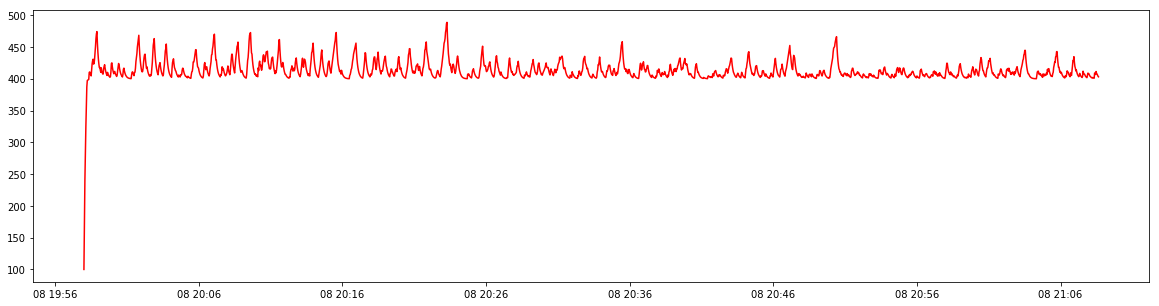

In [39]:
plot_data(idt2.timestamp, idt2.ppm_co2, 'r')

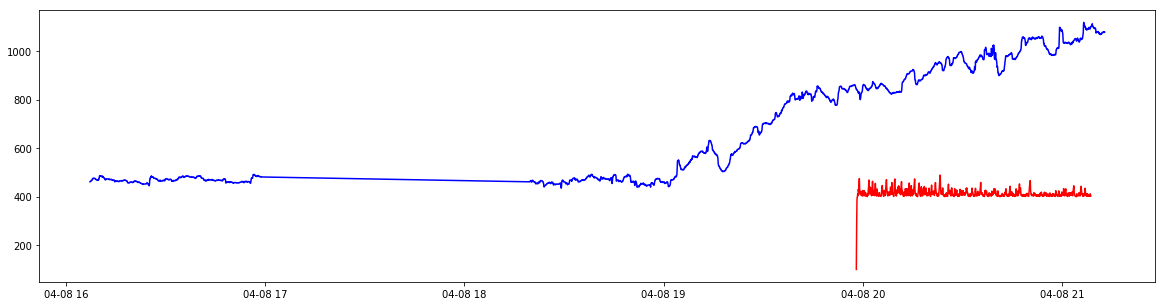

In [40]:
plt.figure(figsize=(20,5))
plt.plot(dsco21.timestamp, dsco21.ppm_co2, 'b')
plt.plot(idt2.timestamp, idt2.ppm_co2, 'r')

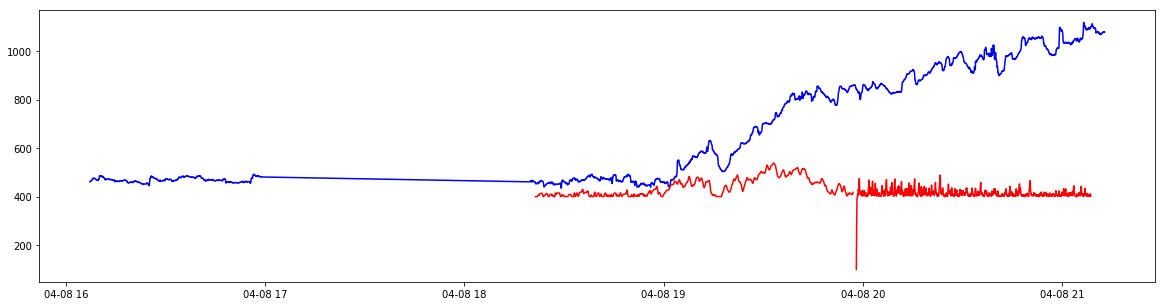

In [41]:
plt.figure(figsize=(20,5))
plt.plot(dsco21.timestamp, dsco21.ppm_co2, 'b')
plt.plot(idt2.timestamp, idt2.ppm_co2, 'r')
plt.plot(idt1.timestamp, idt1.ppm_co2, 'r')